In [ ]:
# Project Cardio entails of:
# Building a machine learning system that can detect whether an individual has cardiovascular disease or not.

# Read more about CVDs at: https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)

# Heart Disease Detection Using Python And Machine Learning YouTube video: https://www.youtube.com/watch?v=kySc5Wg1Gxw&t=73s

In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
#Dataset link: https://www.kaggle.com/sulianova/cardiovascular-disease-dataset/data
#Load the data
from google.colab import files
uploaded = files.upload()

Saving cardio_train.csv to cardio_train.csv


In [ ]:
# Store the data into a variable
# df stands for data frame

df = pd.read_csv('cardio_train.csv', sep = ';')

# Print the first 7 rows of data 

df.head(7)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0


In [ ]:
# Get the shape of the data
df.shape

(70000, 13)

In [ ]:
# Count the empty values in each column
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
df.isnull().values.any()

False

In [ ]:
# Some basic statistics
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Set for only male
df = df[df['gender'] == 2]

In [ ]:
# Check statistics
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,24470.000000,24470.000000,24470.0,24470.000000,24470.000000,24470.000000,24470.000000,24470.000000,24470.000000,24470.000000,24470.000000,24470.000000,24470.000000
mean,50110.246547,19392.097875,2.0,169.947895,77.257307,130.078872,100.551982,1.333633,1.210462,0.218880,0.106375,0.806906,0.505231
std,28993.696139,2529.752770,0.0,7.228895,14.187636,146.186152,211.557292,0.653764,0.551493,0.413496,0.308323,0.394734,0.499983
min,0.000000,10798.000000,2.0,65.000000,10.000000,-150.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25023.000000,17502.000000,2.0,165.000000,68.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50003.000000,19655.500000,2.0,170.000000,75.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,75430.750000,21321.000000,2.0,175.000000,85.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99996.000000,23713.000000,2.0,207.000000,200.000000,14020.000000,10000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Basic statistics of first 75% and last 25%
# Split dataframe into two parts
df_train, df_test = df.iloc[:18352, :], df.iloc[6118:, :]
# Display data for each
df_train.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,18352.000000,18352.000000,18352.0,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000
mean,37553.873856,19393.872820,2.0,169.963710,77.168134,130.596447,100.914342,1.331354,1.211312,0.220248,0.105874,0.806888,0.502071
std,21764.406355,2532.442646,0.0,7.205667,14.064638,168.252812,230.055414,0.650283,0.552637,0.414425,0.307685,0.394751,0.500009
min,0.000000,10798.000000,2.0,65.000000,11.000000,-150.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,18901.250000,17510.000000,2.0,165.000000,68.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,37352.000000,19663.000000,2.0,170.000000,75.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,56406.250000,21321.000000,2.0,175.000000,85.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,75430.000000,23692.000000,2.0,207.000000,200.000000,14020.000000,10000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Count of number of patients w/ or w/o cardiovascular disease
df['cardio'].value_counts()

1    12363
0    12107
Name: cardio, dtype: int64

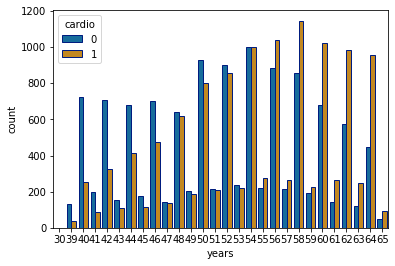

In [ ]:
# Number of patients who have cardiovascular disease by age

#Create years column
df['years'] = (df['age'] / 365).round(0)
df['years'] = pd.to_numeric(df['years'], downcast = 'integer')

#Visualize data
sns.countplot(x='years', hue='cardio', data=df, palette='colorblind', edgecolor= sns.color_palette('dark', n_colors=1))

In [ ]:
#Get corelation of the columns
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
id,1.000000,-0.003459,NaN,-0.004691,0.005086,0.004638,-0.002763,0.007503,0.002722,-0.006588,0.002409,0.002219,0.009977,-0.004010
age,-0.003459,1.000000,NaN,-0.085800,0.017446,0.010630,0.011743,0.135546,0.091324,-0.061021,-0.035909,-0.005803,0.209732,0.999139
gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
height,-0.004691,-0.085800,NaN,1.000000,0.409404,0.008358,0.015419,0.030970,0.019091,0.037559,0.030816,0.008906,0.017189,-0.085204
weight,0.005086,0.017446,NaN,0.409404,1.000000,0.025574,0.036230,0.148485,0.118181,0.014402,0.040259,-0.022133,0.184023,0.017589
ap_hi,0.004638,0.010630,NaN,0.008358,0.025574,1.000000,0.015181,0.023440,0.005455,-0.005195,0.000265,0.007651,0.059660,0.009942
ap_lo,-0.002763,0.011743,NaN,0.015419,0.036230,0.015181,1.000000,0.023452,0.009796,-0.002430,0.009047,0.003925,0.056017,0.012034
cholesterol,0.007503,0.135546,NaN,0.030970,0.148485,0.023440,0.023452,1.000000,0.420279,0.031303,0.045528,0.020970,0.207709,0.135265
gluc,0.002722,0.091324,NaN,0.019091,0.118181,0.005455,0.009796,0.420279,1.000000,-0.002730,0.014221,0.005713,0.071893,0.091183
smoke,-0.006588,-0.061021,NaN,0.037559,0.014402,-0.005195,-0.002430,0.031303,-0.002730,1.000000,0.360388,0.047876,-0.032620,-0.061377


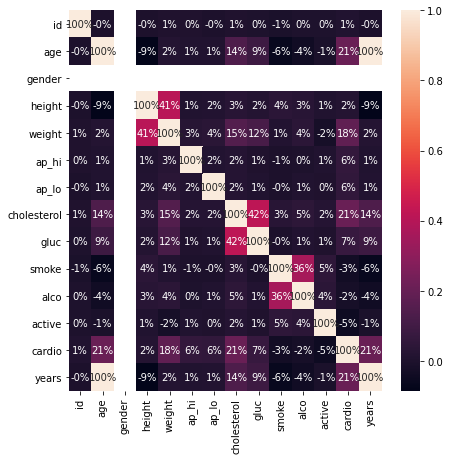

In [ ]:
#Visualize the data
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [ ]:
#Remove years and ID column
df = df.drop('years', axis=1)
df = df.drop('id', axis=1)

In [ ]:
#Split the data into feature data and target data
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [ ]:
# Split the data again, into 75% training data set and 25% testing data set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.25, random_state = 1)

In [ ]:
#Feature Scaling
#Scale the values in the data to be values between 0 and 1 inclusive
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Use Random Forest Classifier
# Its not working
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 1)
forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
# Test the model's accuracy on the training data set
model = forest
model.score(X_train, Y_train)

0.979904761904762

In [ ]:
# Test the model's accuracy on the test data set
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, model.predict(X_test))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

#Print the confusion matrix
print(cm)

# Print the model's accuracy on the test data
print('Model Test Accuracy = {}' . format( (TP + TN) / (TP + TN + FN + FP) ) )

# Print each value
print('True Positive = {}'. format( (TP) / (TP + TN + FN + FP) ) )
print('True Negative = {}'. format( (TN) / (TP + TN + FN + FP) ) )
print('False Positive = {}'. format( (FP) / (TP + TN + FN + FP) ) )
print('False Negative = {}'. format( (FN) / (TP + TN + FN + FP) ) )

[[6487 2122]
 [3093 5798]]
Model Test Accuracy = 0.702
True Positive = 0.33131428571428573
True Negative = 0.3706857142857143
False Positive = 0.12125714285714286
False Negative = 0.17674285714285715
